In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('onion.csv')
df = df.replace(np.nan,' ', regex=True)
df['state'] = df['state'].str.strip()
df.head(5)

,pub-date,article_id,city,state,href,content
0,20150812,51074,boston,,/article/lone-tent-dark-harbinger-looming-stre...,arriving suddenly overnight without any prior ...
1,20150812,51068,washington,,/article/arne-duncan-stressed-about-preparing-...,saying the long nights of cramming from the st...
2,20150812,51072,alamo,ca,/article/male-friends-depart-annual-camping-tr...,saying they d been looking forward to the outi...
3,20150812,51071,washington,,/article/new-study-finds-earths-core-will-be-m...,according to a study published wednesday by ge...
4,20150811,51070,dover,de,/article/area-man-nostalgic-time-when-ads-targ...,reminiscing about past online promotions for g...


In [3]:
us = pd.read_csv('cities.csv')
us = us[['state','city','lat','lng']]
us.head()

,state,city,lat,lng
0,AL,Acmar,33.584132,-86.515570
1,AL,Adamsville,33.588437,-86.959727
2,AL,Adger,33.434277,-87.167455
3,AL,Keystone,33.236868,-86.812861
4,AL,New Site,32.941445,-85.951086


In [4]:
us['stat_city'] = us['city'].map(str) + '_' + us['state']
us['stat_city'] = us['stat_city'].str.lower()
us['city'] = us['city'].str.lower()
us.head()

,state,city,lat,lng,stat_city
0,AL,acmar,33.584132,-86.515570,acmar_al
1,AL,adamsville,33.588437,-86.959727,adamsville_al
2,AL,adger,33.434277,-87.167455,adger_al
3,AL,keystone,33.236868,-86.812861,keystone_al
4,AL,new site,32.941445,-85.951086,new site_al


In [5]:
cities = set(us['city'].values)
#cities

In [6]:
cities_remove = set(['madrid', 'london', 'ottawa', 'earth', 'jerusalem', 'geneva', 'paris',
                     'amsterdam', 'rome', 'damascus', 'johannesburg', 'vancouver', 'cairo',
                     'vienna', 'montreal', 'edinburgh', 'moscow', 'downtown', 'shanghai', 
                     'berlin', 'california', 'tripoli', 'brussels', 'siberia', 'toronto', 
                     'dublin', 'havana', 'stockholm'])

In [7]:
df_new = df.loc[(df['city'].isin(cities)) & (~df['city'].isin(cities_remove))]
df_new = df_new[df_new['state'].str.len() < 3]

In [8]:
#df_new[['city','state']].sort(['city'])

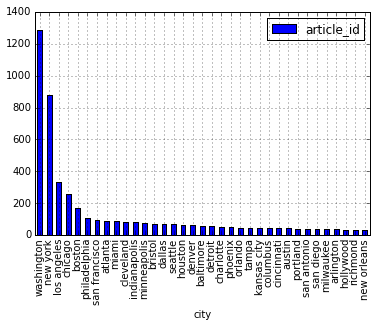

In [9]:
city_count = df_new[['city','article_id']].groupby(['city']).agg('count')
city_count[city_count['article_id']>30].sort(['article_id'],ascending=False).plot(kind='bar');

In [12]:
# big_cities = set(df_new[df_new['state']=='']['city'].values)
# for c in big_cities:
#     if c in cities:
#         print c

In [23]:
temp = df_new[(df_new['state']=='nv') | (df_new['city'] == 'las vegas')]
temp.count()

pub-date      38
article_id    38
city          38
state         38
href          38
content       38
dtype: int64

In [10]:
df_loc = pd.read_csv('city_location.csv')
df_loc['Location'] = df_loc['Location'].str.lower()
df_loc.head()

,LAT,LON,Location
0,33.58,85.85,anniston_al
1,32.67,85.44,auburn_al
2,33.57,86.75,birmingham_al
3,32.90,87.25,centreville_al
4,31.32,85.45,dothan_al


In [11]:
from wordcloud import WordCloud
%load_ext autoreload
%autoreload 2
from utils import stop_words, tokenize

def draw_word_cloud(df, city, save=False):
    ftopic = df[df['city']==city]
    #ftopic = ftopic.sort('weight', ascending=False).head(n_articles)

    text = list(ftopic['content'].values)
    text = " ".join(text)
    #remove stop words and lemmatize
    text = tokenize(text) # but this tokenizes again!
    text = " ".join(text)

    
    wordcloud = WordCloud(ranks_only=True).generate(text)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud)
    plt.axis("off")

#     if save:
#         fileName = outdir + "topic_"+str(topic)+"temp.png"
#         plt.savefig(fileName, bbox_inches='tight')


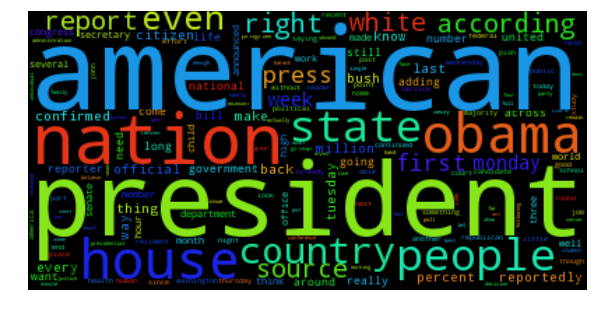

In [17]:
draw_word_cloud(df_new, 'washington')

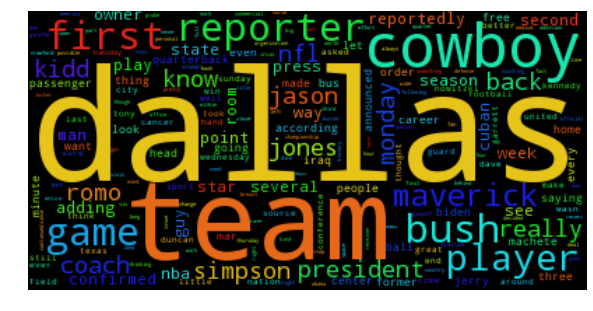

In [13]:
draw_word_cloud(df_new, 'dallas')

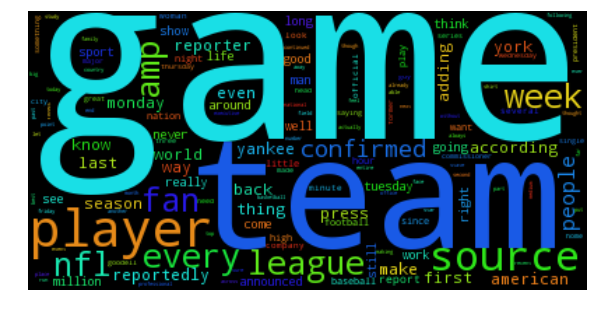

In [14]:
draw_word_cloud(df_new, 'new york')

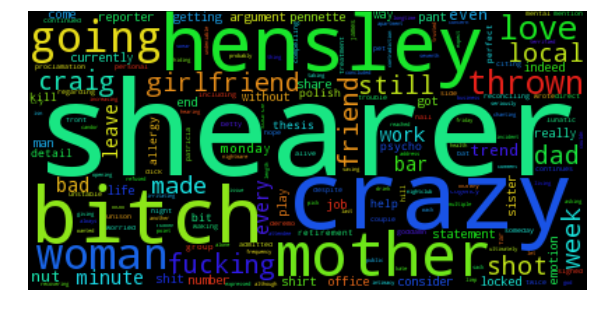

In [15]:
draw_word_cloud(df_new, 'reno')

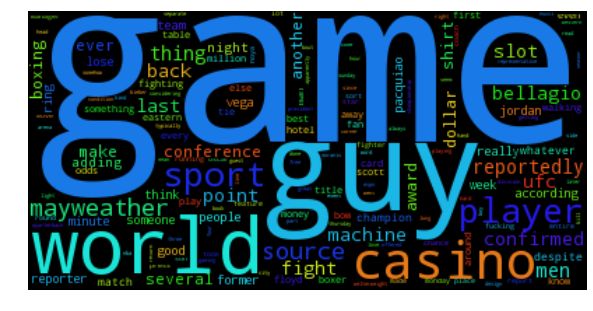

In [24]:
draw_word_cloud(df_new, 'las vegas')